# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 5: *LaplacianKernel*
Creates a Laplacian kernel of arbitrary size

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import createImageF
from PrintUtilities import printImageRangeF
from ImagePropertiesUtilities import imageMaxMin
from PlotUtilities import plotSurface

# Math and iteration
from math import exp
from timeit import itertools

### Parameters:
    kernelSize = Size of the kernel
    sigma = Standard deviation of the kernel

### Setup parameters

In [2]:
kernelSize = 15
sigma = 1.5

### Create kernel

In [3]:
kernelLaplacian = createImageF(kernelSize, kernelSize)

s2Inv = 1.0 / (sigma * sigma)
kernelCentre = (kernelSize - 1) / 2

# Generate kernel values
sumValues = 0.0
for x,y in itertools.product(range(0, kernelSize), range(0, kernelSize)):        
    nx2 = float(x-kernelCentre) * float(x-kernelCentre)
    ny2 = float(y-kernelCentre) * float(y-kernelCentre)
    s = 0.5 * (nx2 + ny2) * s2Inv
    
    kernelLaplacian[y,x] = - s2Inv * s2Inv * (1.0 - s) * exp(-s)
    sumValues += kernelLaplacian[y,x]

# Normalize
for x,y in itertools.product(range(0, kernelSize), range(0, kernelSize)):
    kernelLaplacian[y,x] /= sumValues

### Print kernel

In [4]:
printImageRangeF(kernelLaplacian, [0, kernelSize-1], [0, kernelSize-1], ' 8.2f')



[    -0.00    -0.00    -0.01    -0.05    -0.21    -0.58    -1.07    -1.30    -1.07    -0.58    -0.21    -0.05    -0.01    -0.00    -0.00 ]
[    -0.00    -0.01    -0.12    -0.71    -2.89    -7.69   -13.71   -16.60   -13.71    -7.69    -2.89    -0.71    -0.12    -0.01    -0.00 ]
[    -0.01    -0.12    -1.07    -6.33   -24.24   -61.15  -104.53  -124.47  -104.53   -61.15   -24.24    -6.33    -1.07    -0.12    -0.01 ]
[    -0.05    -0.71    -6.33   -35.24  -124.47  -285.87  -449.04  -515.92  -449.04  -285.87  -124.47   -35.24    -6.33    -0.71    -0.05 ]
[    -0.21    -2.89   -24.24  -124.47  -388.33  -742.73  -936.06  -956.45  -936.06  -742.73  -388.33  -124.47   -24.24    -2.89    -0.21 ]
[    -0.58    -7.69   -61.15  -285.87  -742.73  -929.03  -258.50   322.83  -258.50  -929.03  -742.73  -285.87   -61.15    -7.69    -0.58 ]
[    -1.07   -13.71  -104.53  -449.04  -936.06  -258.50  2517.45  4401.48  2517.45  -258.50  -936.06  -449.04  -104.53   -13.71    -1.07 ]
[    -1.30   -16.60  -124

### Plot surface

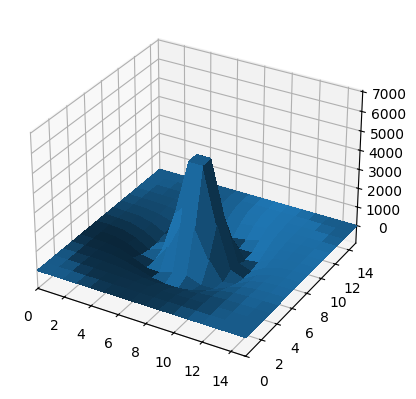

In [5]:
maxValue, minValue = imageMaxMin(kernelLaplacian)
plotSurface(kernelLaplacian, [minValue, maxValue], 1)
